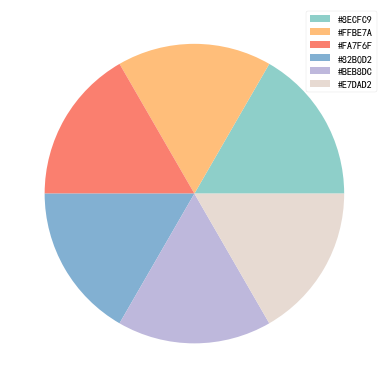

In [2]:
from cycler import cycler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
colors = ['#8ECFC9', '#FFBE7A', '#FA7F6F',
          '#82B0D2', '#BEB8DC', '#E7DAD2']
rc_dict={
    'font.sans-serif':['SimHei']
    ,'axes.unicode_minus':False
    ,'axes.prop_cycle':cycler(color=colors)
    ,'xaxis.labellocation':'right'
    , 'figure.autolayout':True
    }
plt.rcParams.update(rc_dict)
plt.style.use('seaborn-notebook')
# 查看所有的绘图风格
#plt.style.available
fig = plt.figure()
plt.pie([1]*len(colors))#, colors=colors)
plt.legend(colors)
plt.show()

In [ ]:
#提取图像中主要颜色
def get_main_color(img_path, num_colors=5, resize=150):
    '''
    imgh_path: 图片路径
    num_colors: 提取的主要颜色数量
    '''
    import cv2
    import numpy as np
    from PIL import Image 
    image = Image.open(img_path)
    small_image = image.resize((resize, resize))
    result = small_image.convert(
        'P', palette=Image.Palette.ADAPTIVE, colors=num_colors)
    result = result.convert('RGB')
    main_colors = result.getcolors()
    col_extract = []
    for count, col in main_colors:
        col_extract.append([col[i]/255 for i in range(3)])
    return col_extract


img_path = '屏幕截图 2023-02-07 170035.png'
colors=get_main_color(img_path, num_colors=20, resize=80)
colors

# rc参数调整

In [4]:
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)#设置默认绘图颜色
plt.rcParams['figure.figsize']=[10,6.18]
plt.rcParams['figure.autolayout'] = True
plt.rcParams['xaxis.labellocation'] = 'right'
plt.rcParams['yaxis.labellocation'] = 'top'
# plt.rcParams['axes.labelpad'] = 20.0

# 折线图


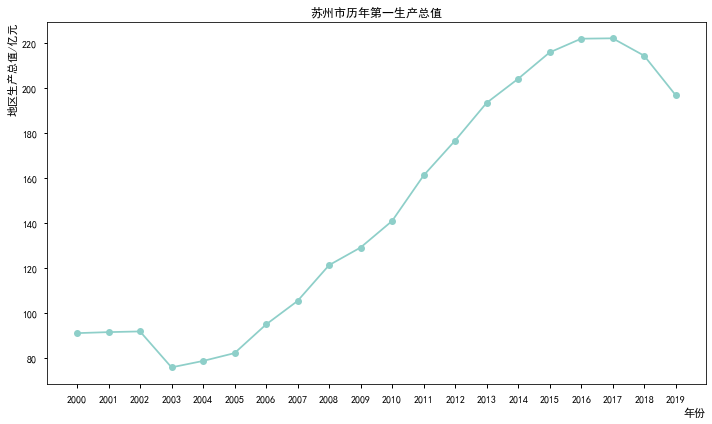

In [8]:
data = pd.read_excel('./raw_data/历年地区生产总值.xlsx')
# data.info()  # 查看导入数据是否存在异常
x = np.arange(data['年份'].shape[0])
x_tick = data['年份']
fig = plt.figure(figsize=(10, 6))
fig.patch.set_alpha(0)
l1, = plt.plot(x, data['第一产业'], color=colors[0],marker='o')
plt.title('苏州市历年第一生产总值')
plt.xlabel('年份', loc='right')
plt.ylabel('地区生产总值/亿元', loc='top')
plt.xticks(x, x_tick)
plt.savefig("./plt样图/折线图.png", transparent=True,
            dpi=300, bbox_inches='tight')


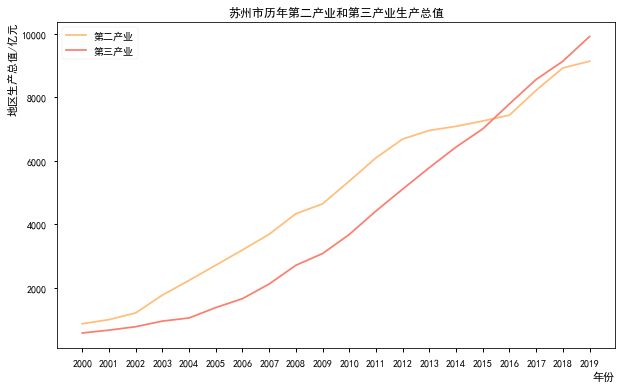

In [9]:
plt.figure(figsize=(10, 6))
l2, = plt.plot(x, data['第二产业'], color=colors[1])
l3, = plt.plot(x, data['第三产业'], color=colors[2])
plt.legend([l2, l3], ['第二产业', '第三产业'])
plt.title('苏州市历年第二产业和第三产业生产总值')
plt.xticks(x, x_tick, rotation=0)
# plt.legend()
# 添加轴标签
# plt绘图背景为透明色
plt.xlabel('年份', loc='right')
plt.ylabel('地区生产总值/亿元', loc='top')
plt.savefig("./plt样图/双折线图.png", transparent=True,
            dpi=300, bbox_inches='tight')
#plt.savefig("./plt样图/GDP.png", facecolor='w')
plt.show()


## 堆叠折线图

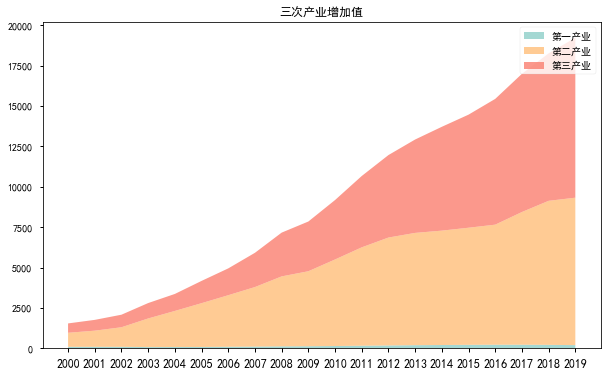

In [10]:
data = pd.read_excel('./raw_data/历年地区生产总值.xlsx')
x_tick = data['年份']
# data.info()  # 查看导入数据是否存在异常
x = np.arange(data['年份'].shape[0])
y=np.vstack(data.iloc[:,2:5].T.values.tolist())
labs = data.columns[2:5].values.tolist()
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.stackplot(x, y, labels=labs, alpha=0.8)
ax.tick_params(axis='x', rotation=90, labelsize=12)
# Decorations
plt.xticks(x,data['年份'] , rotation=0)
ax.set_title('三次产业增加值')
plt.legend()
plt.savefig("./plt样图/堆叠折线图.png", facecolor='w')
plt.show()

# 条形图


In [12]:
x = np.arange(data['年份'].shape[0])
x_tick = data['年份']
y = data['人均生产总值']


## 横向条形图


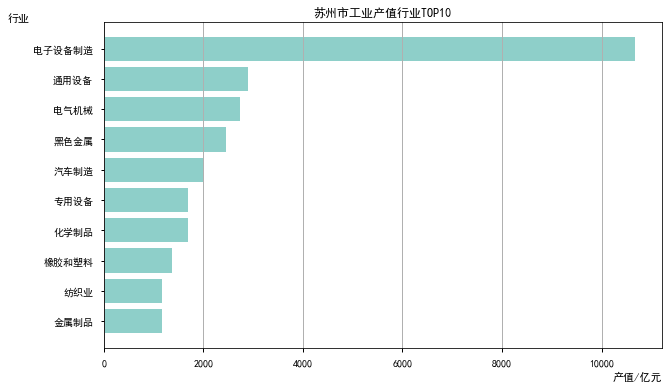

In [9]:
x_tick = ['电子设备制造', '通用设备', '电气机械', '黑色金属',
          '汽车制造', '专用设备', '化学制品', '橡胶和塑料', '纺织业', '金属制品']
x_tick.reverse()
x = np.arange(len(x_tick))
y = [10674, 2891, 2747, 2462, 1993, 1688, 1684, 1362, 1170, 1168]
y.reverse()
# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.barh(x, y, color=colors[0])
plt.title('苏州市工业产值行业TOP10')
plt.yticks(x, x_tick)
# plt.legend()
# 添加轴标签
plt.xlabel('产值/亿元', loc='right')
plt.grid(axis='x')
plt.ylabel('行业', loc='top', rotation=0)
plt.savefig("./plt样图/横向条形图.png", transparent=True,
            dpi=300, bbox_inches='tight')
#plt.savefig("./plt样图/产值.png", facecolor='w')
plt.show()


## 堆叠条形图

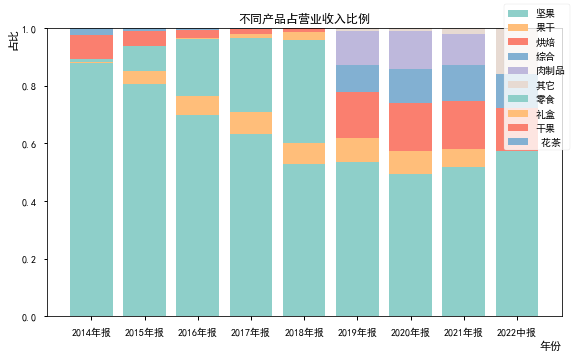

In [5]:
data = pd.read_excel('./raw_data/三只松鼠分产品营收.xlsx')
data.iloc[:, 2:] = data.iloc[:, 2:].apply(
    lambda x: x/data.iloc[:, 2:].sum(axis=1))
x=data['年份']
fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(range(x.shape[0]),data.iloc[:,2],label=data.columns[2])
for i in range(3,len(data.columns)):
    ax1.bar(range(x.shape[0]), data.iloc[:, i],
            bottom=data.iloc[:, 2:i].sum(axis=1), label=data.columns[i])
plt.xticks(range(x.shape[0]), x, rotation=0)
ax1.set(xlabel='年份',ylabel='占比',title='不同产品占营业收入比例')
fig.legend(loc='upper right')
fig.savefig('./plt样图/堆叠条形图',facecolor='w')

# 饼图


In [15]:
x_data = data.iloc[-1, 2:5].tolist()
explode = []
x_tick = data.iloc[-1, 0]
labels = data.columns[2:5].tolist()


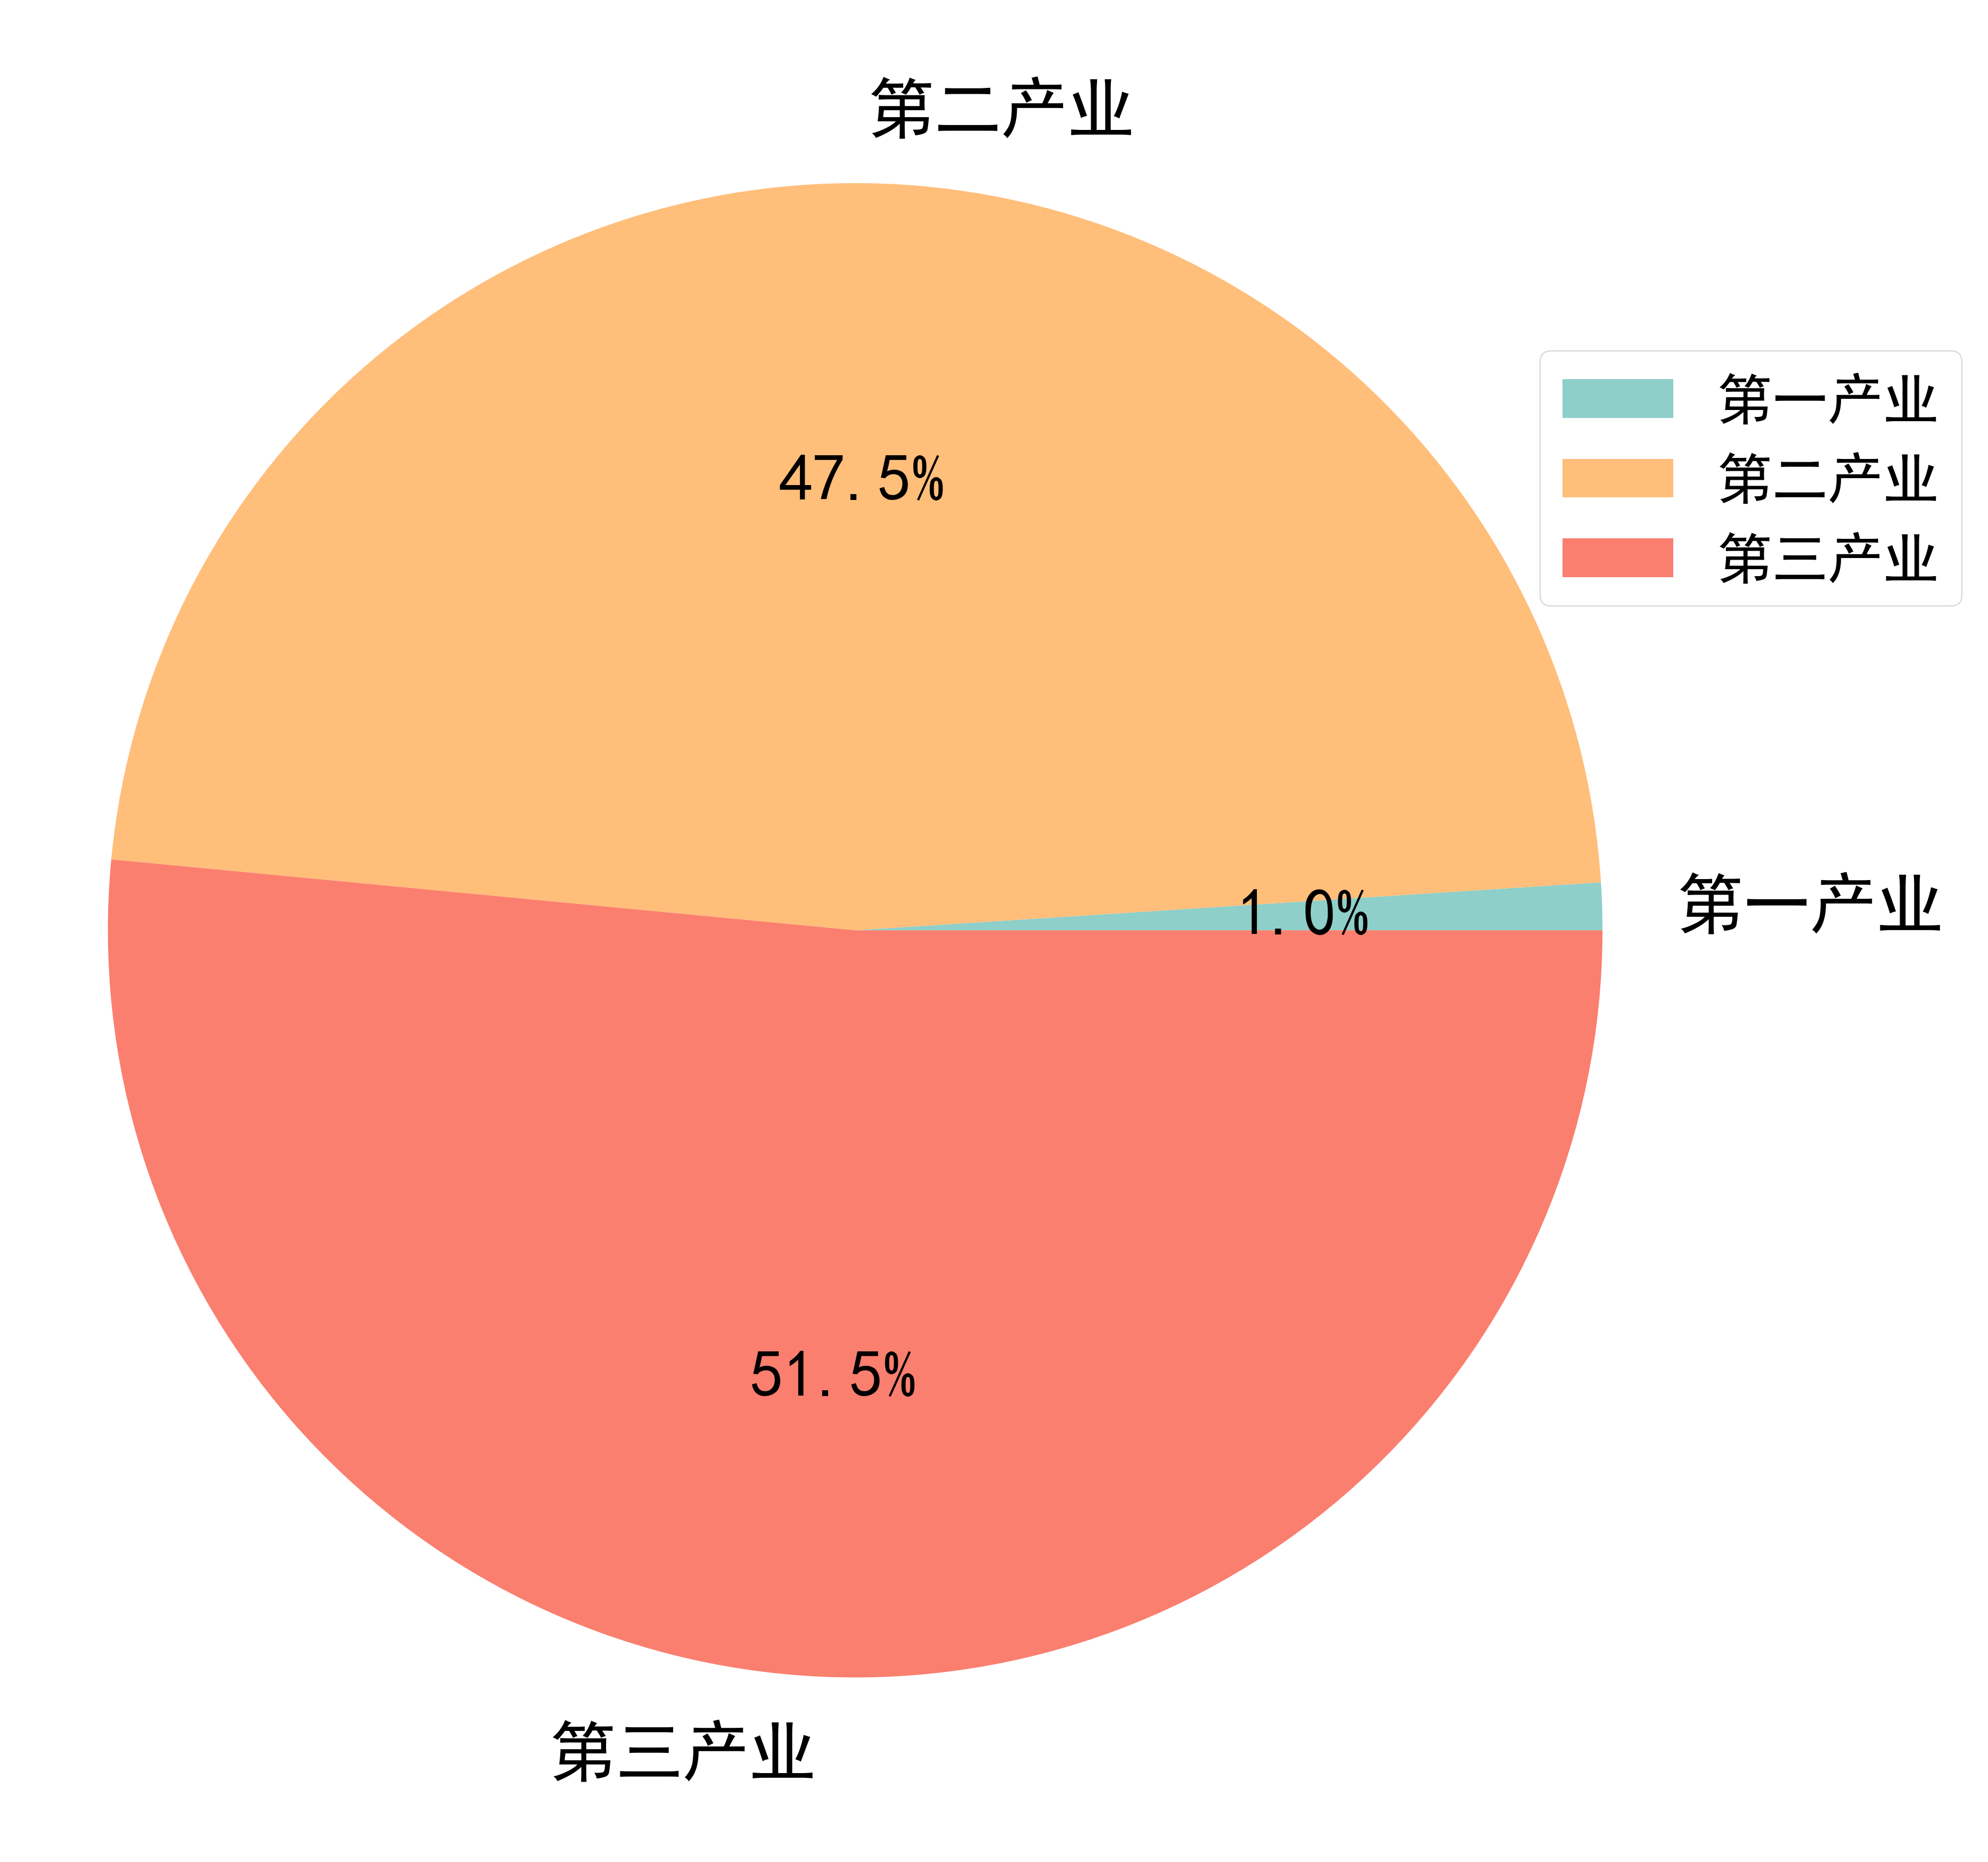

In [16]:
plt.figure(figsize=(8, 9), dpi=500)
patches, l_text, p_text = plt.pie(x_data,
                                  labels=labels,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  shadow=False,  # 设置阴影设置
                                  startangle=0
                                  )
plt.legend(patches, labels,
           loc="center left",
           bbox_to_anchor=(0.9, 0.25, 1, 1),
           fontsize=15)
for t in l_text:  # 设置文本大小
    t.set_size(18)
for t in p_text:  # 设置百分比的文字大小
    t.set_size(18)
plt.axis('equal')
# plt.savefig("铅钡玻璃颜色饼状图.png")
plt.show()


<Figure size 4000x4500 with 0 Axes>

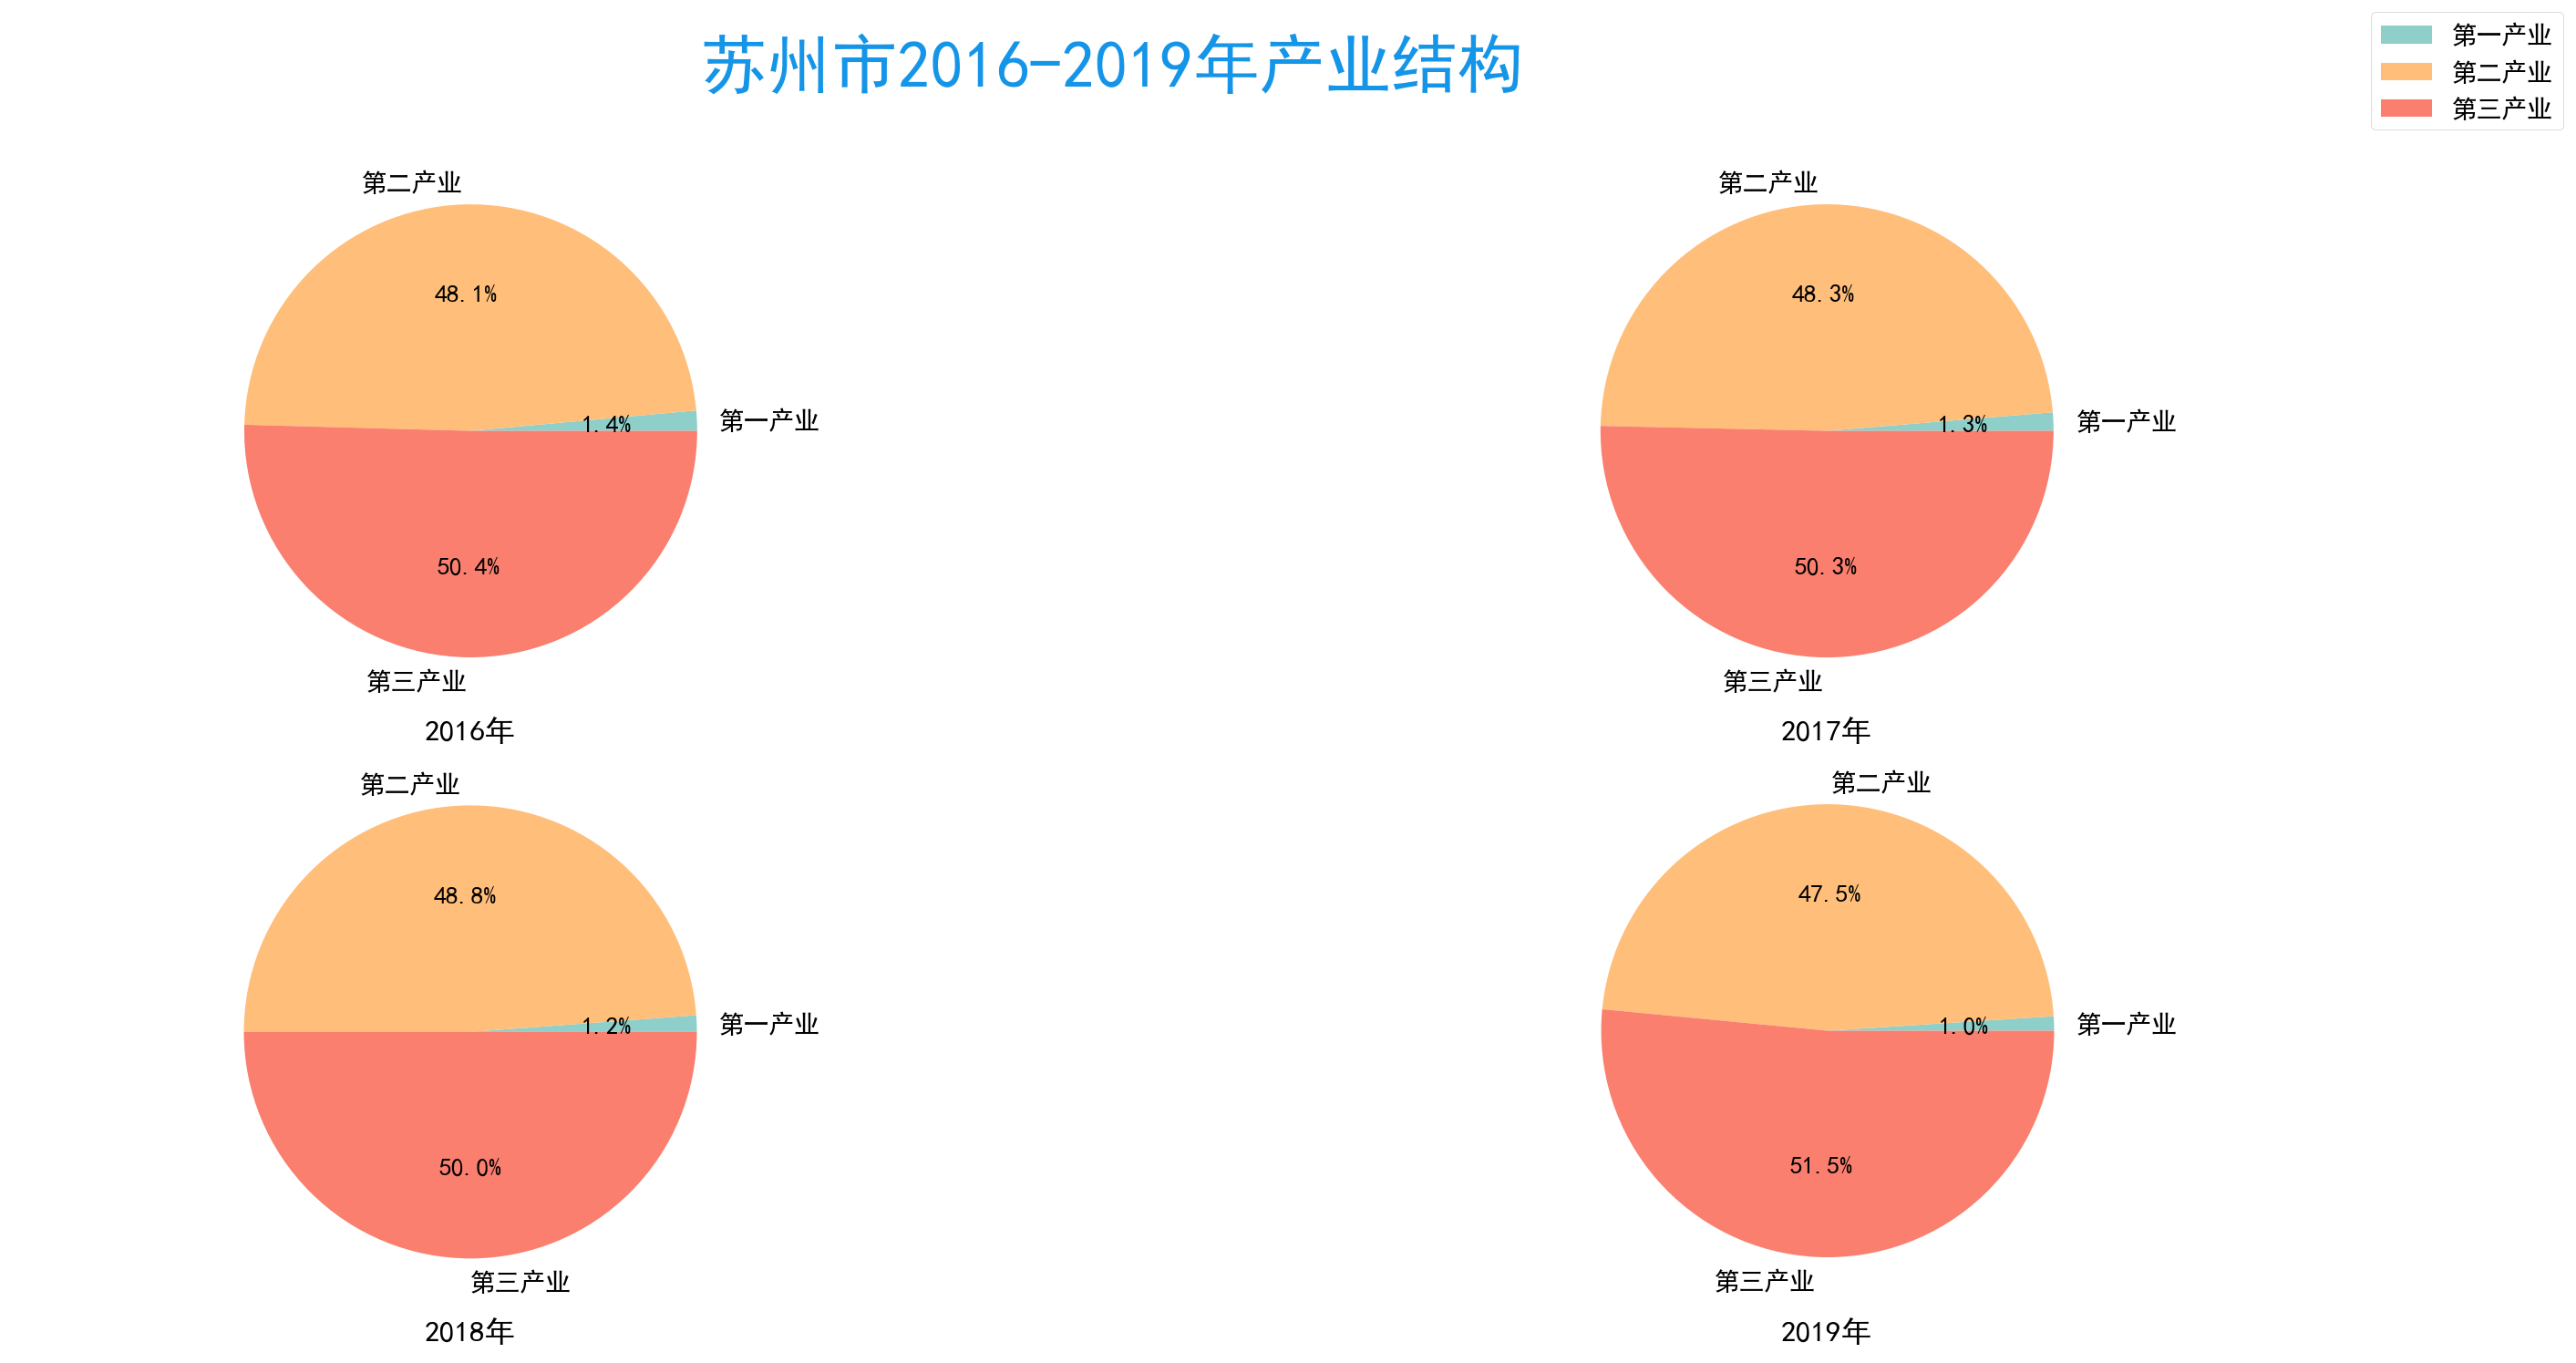

In [17]:
plt.figure(figsize=(8, 9), dpi=500)
fig, axj = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), dpi=200)
axes = axj.flatten()  # 子图展平
i = -4
explode = []

for ax in axes:
    x_data = data.iloc[i, 2:5].tolist()
    x_tick = data.iloc[i, 0]
    labels = data.columns[2:5].tolist()
    labels = data.columns[2:5].tolist()
    patches, l_text, p_text = ax.pie(x_data,
                                     colors=colors,
                                     labels=labels,
                                     autopct='%1.1f%%',
                                     shadow=False,  # 设置阴影设置
                                     startangle=0
                                     )
    # for t in l_text:  # 设置文本大小
    #     t.set_size(0)
    # for t in p_text:  # 设置百分比的文字大小
    # t.set_size()
    ax.axis('equal')
    ax.set_title(f"{data.iloc[i,0]}年", y=-0.15)  # 设置文字标题在下边显示
    plt.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=0.5, hspace=0.2)  # 调整子图间距
    i = i+1
patches, labels = fig.axes[-1].get_legend_handles_labels()
# 图例的位置，bbox_to_anchor=(0.5, 0.92),
labels = data.columns[2:5].tolist()
fig.legend(patches, labels, loc='upper right')
# 添加标题
fig.suptitle('苏州市2016-2019年产业结构', fontsize=26, color='#1595E7')
plt.savefig('./plt样图/多子图饼图.png')
plt.show()


# 散点图绘制


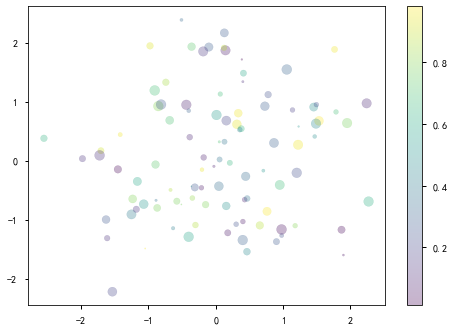

In [18]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 100 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar()  # 显示颜色对比条
# plt.savefig("./plt样图/scatter2010.png", transparent=True,
# dpi=300, bbox_inches='tight')
plt.savefig("./plt样图/散点图.png", facecolor='white')
plt.show()

`scatter`和`plot`函数都支持散点图绘制，但是因为前者对点的属性自定义化程度更高，因此性能上会有劣势。

# 添加辅助轴


## 单图共享


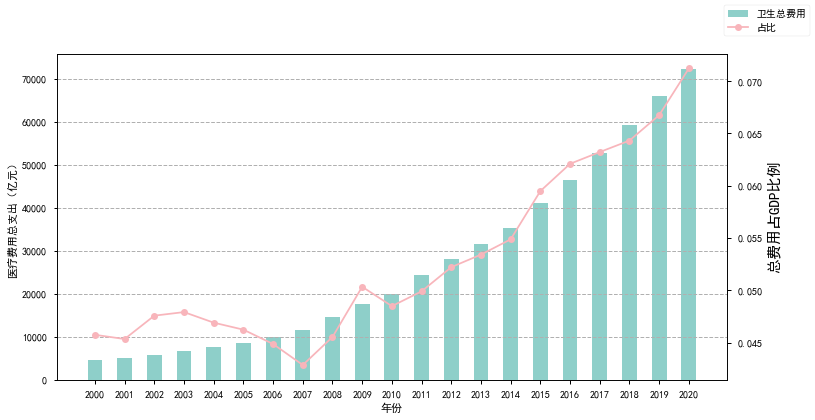

In [2]:
data = pd.read_excel('./data/卫生.xlsx')
# 共享x轴
data['年份'] = pd.to_datetime(data['年份'], format='%Y').dt.year
x = np.arange(data['年份'].shape[0])
x_tick = data['年份']
y = data['卫生总费用:合计(亿元)']
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(x, y, width=0.5, color="#8ECFC9", label='卫生总费用')
ax1.set_xlabel('年份')
ax1.set_ylabel("医疗费用总支出（亿元）")
ax1.grid(axis='y', linestyle='--')
ax1.tick_params(axis='both', which='major')
ax2 = ax1.twinx()
ax2.plot(x, data['总费用占GDP比例'], color='#F8B5BB', marker='o', label='占比')
ax2.set_ylabel("总费用占GDP比例", fontsize=15)
ax2.tick_params(axis='both', which='major')
plt.xticks(x, x_tick, rotation=0)
ax2.grid(False)
fig.legend(loc=1, bbox_transform=ax1.transAxes)
# fig.savefig("./plt样图/条形折线图.png", transparent=True,
#             dpi=300, bbox_inches='tight')
fig.savefig("./plt样图/条形折线图.png", facecolor='w')
plt.show()


## 日本GDP增速

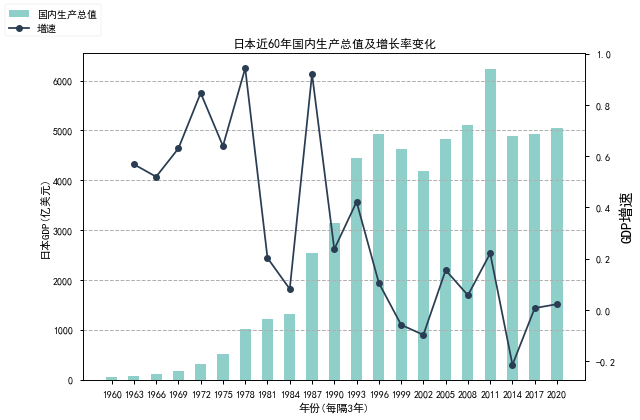

In [16]:
data = pd.read_excel('./data/日本GDP.xlsx')[0::3]
# 共享x轴
x = np.arange(data['year'].shape[0])
x_tick = data['year']
y = data['GDP']
fig, ax1 = plt.subplots(figsize=(9, 6))
ax1.bar(x, y, width=0.5, color="#8ECFC9", label='国内生产总值')
ax1.set_xlabel('年份(每隔3年)')
ax1.set_ylabel("日本GDP(亿美元)")
ax1.grid(axis='y', linestyle='--')
ax1.tick_params(axis='both', which='major')
ax2 = ax1.twinx()
ax2.plot(x, y.pct_change(), color='#2A3D52', marker='o', label='增速')
ax2.set_ylabel("GDP增速", fontsize=15)
ax2.tick_params(axis='both', which='major')
plt.xticks(x, x_tick, rotation=0)
ax2.grid(False)
plt.title('日本近60年国内生产总值及增长率变化')
fig.legend(loc=2, bbox_transform=ax1.transAxes)
fig.savefig("./条形折线图.png", transparent=True,
            dpi=300, bbox_inches='tight')
#fig.savefig("./日本GDP变化图.png", facecolor='w')
plt.show()


## 坐标轴共享


### 数据导入


In [10]:
edt_data = pd.read_excel('./data/外债总额.xlsx')
edt_data['年份'] = pd.to_datetime(edt_data['年份']).dt.year
gdp_data = pd.read_excel('./data/GDP.xlsx')
gdp_data['年份'] = pd.to_datetime(gdp_data['年份']).dt.year
# 计算两个df指定列的差值


def cal_diff(df1, df2, col1, col2):
    df1 = df1.set_index('年份')
    df2 = df2.set_index('年份')
    df = df1.join(df2)
    df['负债率'] = df[col1]/df[col2]
    return df


data = cal_diff(edt_data, gdp_data,
                edt_data.columns[-1], gdp_data.columns[-1]).reset_index()[16:]
x = np.arange(data['年份'].shape[0])
x_tick = data['年份']
y1 = data.iloc[:, 1]  # 子图1y轴数据
y2 = data.iloc[:, -1]  # 折线图y轴数据
y3 = data.iloc[:, -2]  # 图2y轴数据

data.head()


,年份,外债总额(亿人民币),国内生产总值（亿人民币）,负债率
16,2001,16826.32780,110863.12,0.151776
17,2002,16771.88773,121717.42,0.137794
18,2003,18155.76912,137422.03,0.132117
19,2004,21766.36735,161840.16,0.134493
20,2005,23925.44028,187318.90,0.127726


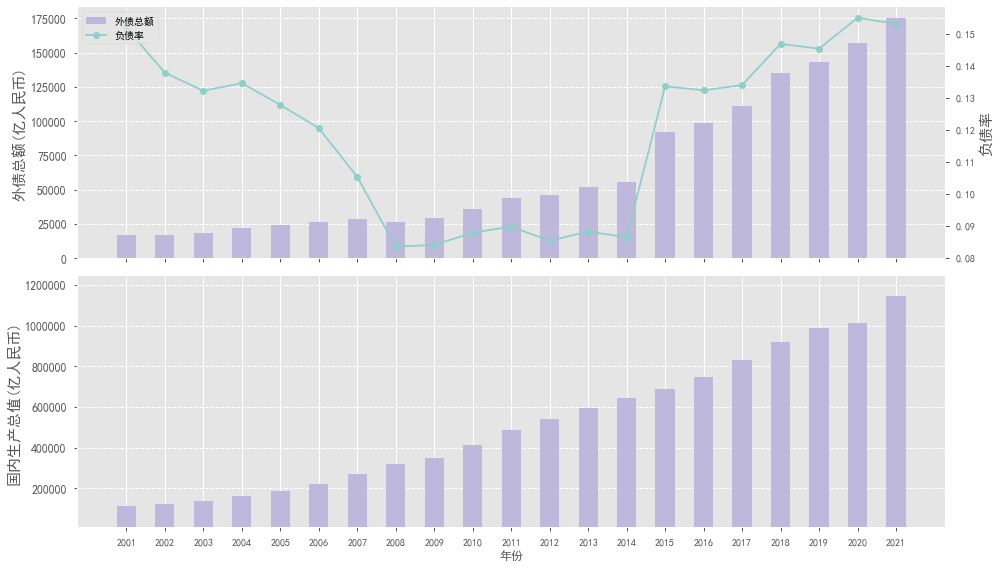

In [11]:
fig, (ax1, ax3) = plt.subplots(
    nrows=2, ncols=1,
    sharex=True,
    figsize=(14, 8)
)
# fig.tight_layout(pad=2)
bar1=ax1.bar(x, y1, width=0.5, color="#BEB8DC", label='外债总额')
ax1.set_ylabel("外债总额(亿人民币)", fontsize=15)
ax1.grid(axis='y', linestyle='--')
ax2 = ax1.twinx()
line1,=ax2.plot(x, y2, color="#8ECFC9",  marker='o', label='负债率')
ax2.set_ylabel("负债率", fontsize=15)
ax2.grid(False)
ax1.tick_params(axis='both', which='major', labelsize=12)
# 不同axes添加图例
p1, l1 = ax1.get_legend_handles_labels()
p2, l2 = ax2.get_legend_handles_labels()
plt.legend(p1+p2,l1+l2,loc=2)
ax3.bar(x, y3, width=0.5, color="#BEB8DC")
ax3.set_xlabel('年份')
ax3.set_ylabel("国内生产总值(亿人民币)", fontsize=15)
ax3.grid(axis='y', linestyle='--')
y3_max = y3.max()
y3_min = y3.min()
d = y3_max-y3_min
ax3.set_ylim(y3_min-d*0.1, y3_max+d*0.1)
ax3.ticklabel_format(style='plain', axis='y')
ax3.tick_params(axis='y', which='major', labelsize=12)
plt.xticks(x, x_tick, rotation=0)
# 图例的位置，bbox_to_anchor=(0.5, 0.92)
plt.tight_layout()
plt.savefig("./plt样图/共享x轴.png", facecolor='w')
plt.show()


# 多 figure 的绘制


## 数据准备


In [ ]:
import pandas as pd
edt_data = pd.read_excel('./data/外债总额.xlsx')
edt_data['年份'] = pd.to_datetime(edt_data['年份']).dt.year
gdp_data = pd.read_excel('./data/GDP.xlsx')
gdp_data['年份'] = pd.to_datetime(gdp_data['年份']).dt.year
# 定义函数计算经济负债率


def cal_diff(df1, df2, col1, col2):
    df1 = df1.set_index('年份')
    df2 = df2.set_index('年份')
    df = df1.join(df2)
    df['负债率'] = df[col1]/df[col2]
    return df


data = cal_diff(edt_data, gdp_data,
                edt_data.columns[-1], gdp_data.columns[-1]).reset_index()[19:]
# 计算结果展示
data.describe()


,年份,外债总额(亿人民币),国内生产总值（亿人民币）,负债率
count,18.000000,18.000000,1.800000e+01,18.000000
mean,2012.500000,72359.087694,5.839967e+05,0.116226
std,5.338539,51831.008743,3.075621e+05,0.026985
min,2004.000000,21766.367350,1.618402e+05,0.083380
25%,2008.250000,28636.450936,3.265629e+05,0.087862
50%,2012.500000,49085.852885,5.657716e+05,0.124089
75%,2016.750000,108228.590625,8.106257e+05,0.134340
max,2021.000000,175040.818000,1.143670e+06,0.154906


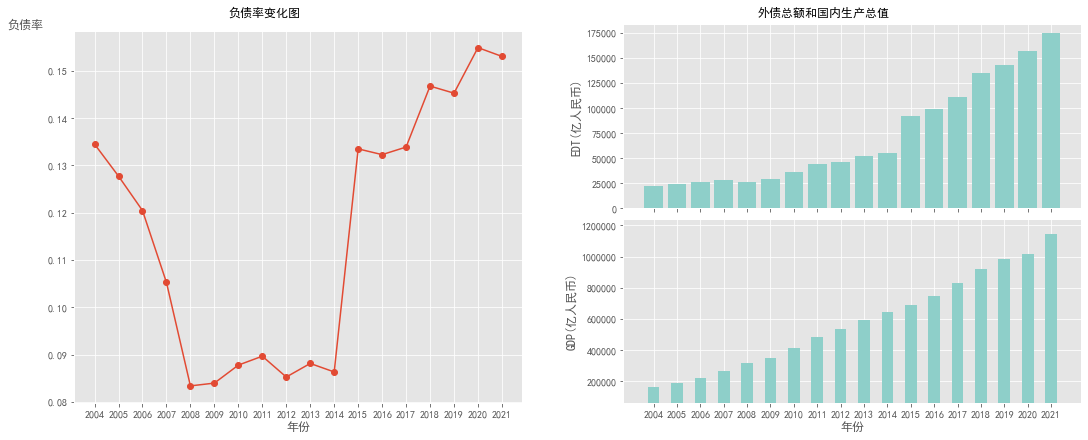

In [ ]:
x = np.arange(data['年份'].shape[0])
x_tick = data['年份']
y = data.iloc[:, 1]
fig = plt.figure(constrained_layout=True, figsize=(15, 6))
subfigs = fig.subfigures(1, 2, wspace=0.07)
# 绘制左侧折线图
ax1 = subfigs[0].subplots(1, 1, sharey=False)
ax1.plot(x, data.iloc[:, -1], marker='o', label='负债率')
ax1.set_ylabel("负债率", loc='top', rotation=0)
ax1.set_xlabel("年份")
plt.xticks(x, x_tick, rotation=0)
subfigs[0].suptitle('负债率变化图')
# 绘制右侧直方图
subfigs[1].suptitle("外债总额和国内生产总值")

(ax2, ax3) = subfigs[1].subplots(2, 1, sharex=True)
ax2.bar(x, data.iloc[:, 1], color='#8ECFC9')
ax2.set_ylabel("EDT(亿人民币)")
plt.xticks(x, x_tick, rotation=0)
ax3.set_xlabel('年份')
ax3.bar(x, data.iloc[:, -2], width=0.5, color="#8ECFC9")
ax3.set_ylabel("GDP(亿人民币)")
max = data.iloc[:, -2].max()
min = data.iloc[:, -2].min()
d = max-min
ax3.set_ylim(min-d*0.1, max+d*0.1)
ax3.ticklabel_format(style='plain', axis='y')
plt.savefig("./plt样图/多figure.png", facecolor='w')
plt.show()


## 金统作业


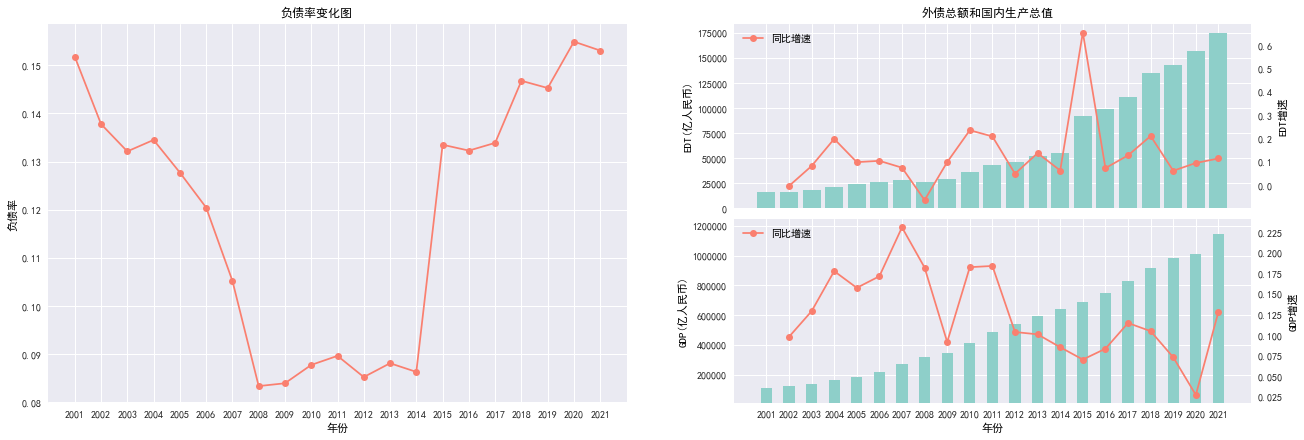

In [ ]:
# 细节优化版
x = np.arange(data['年份'].shape[0])
x_tick = data['年份']
y = data.iloc[:, 1]
fig = plt.figure(constrained_layout=True, figsize=(18, 6))
subfigs = fig.subfigures(1, 2, wspace=0.07)
# 绘制左侧折线图
ax1 = subfigs[0].subplots(1, 1, sharey=False)
ax1.plot(x, data.iloc[:, -1], color='#FA7F6F', marker='o', label='负债率')
ax1.set_ylabel("负债率")
ax1.set_xlabel("年份")
plt.xticks(x, x_tick, rotation=0)
subfigs[0].suptitle('负债率变化图')
# 绘制右侧直方图
subfigs[1].suptitle("外债总额和国内生产总值")
(ax2, ax3) = subfigs[1].subplots(2, 1, sharex=True)
ax2.bar(x, data.iloc[:, 1], color='#8ECFC9', label='EDT')
ax2.set_ylabel("EDT(亿人民币)")
ax5 = ax2.twinx()
ax5.plot(x, data['外债总额(亿人民币)'].pct_change(),
         color='#FA7F6F', marker='o', label='同比增速')
ax5.grid(False)
ax5.set_ylabel("EDT增速")
plt.xticks(x, x_tick, rotation=0)
plt.legend(loc=2, bbox_to_anchor=(0, 1), bbox_transform=ax5.transAxes)
ax3.set_xlabel('年份')
ax3.bar(x, data.iloc[:, -2], width=0.5, color="#8ECFC9", label='GDP')
ax3.set_ylabel("GDP(亿人民币)")
max = data.iloc[:, -2].max()
min = data.iloc[:, -2].min()
d = max-min
ax3.set_ylim(min-d*0.1, max+d*0.1)
ax3.ticklabel_format(style='plain', axis='y')
ax4 = ax3.twinx()
ax4.plot(x, data['国内生产总值（亿人民币）'].pct_change(),
         color='#FA7F6F', marker='o', label='同比增速')
ax4.grid(False)
ax4.set_ylabel("GDP增速")
plt.legend(loc=2, bbox_transform=ax4.transAxes)
#plt.savefig("./结果.png", facecolor='w')
plt.show()


# 图例问题

In [ ]:
#取消图例
plt.legend().remove()

## 多ax

In [ ]:
# 不同axes添加图例
p1, l1 = ax1.get_legend_handles_labels()
p2, l2 = ax2.get_legend_handles_labels()
plt.legend(p1+p2,l1+l2,loc=2)

## 多figure


In [ ]:
# 多图公用一个图例
patches, labels = fig.axes[-1].get_legend_handles_labels()
# 图例的位置，bbox_to_anchor=(0.5, 0.92)
fig.legend(patches, labels, loc='upper right')


# 多子图的格式调整

对于多子图的绘制，每一张子图的调整还和原来一致，与单图的绘制相比多子图时应该注意子图的布局以及多张子图公用元素的一些调整


<Figure size 4000x4500 with 0 Axes>

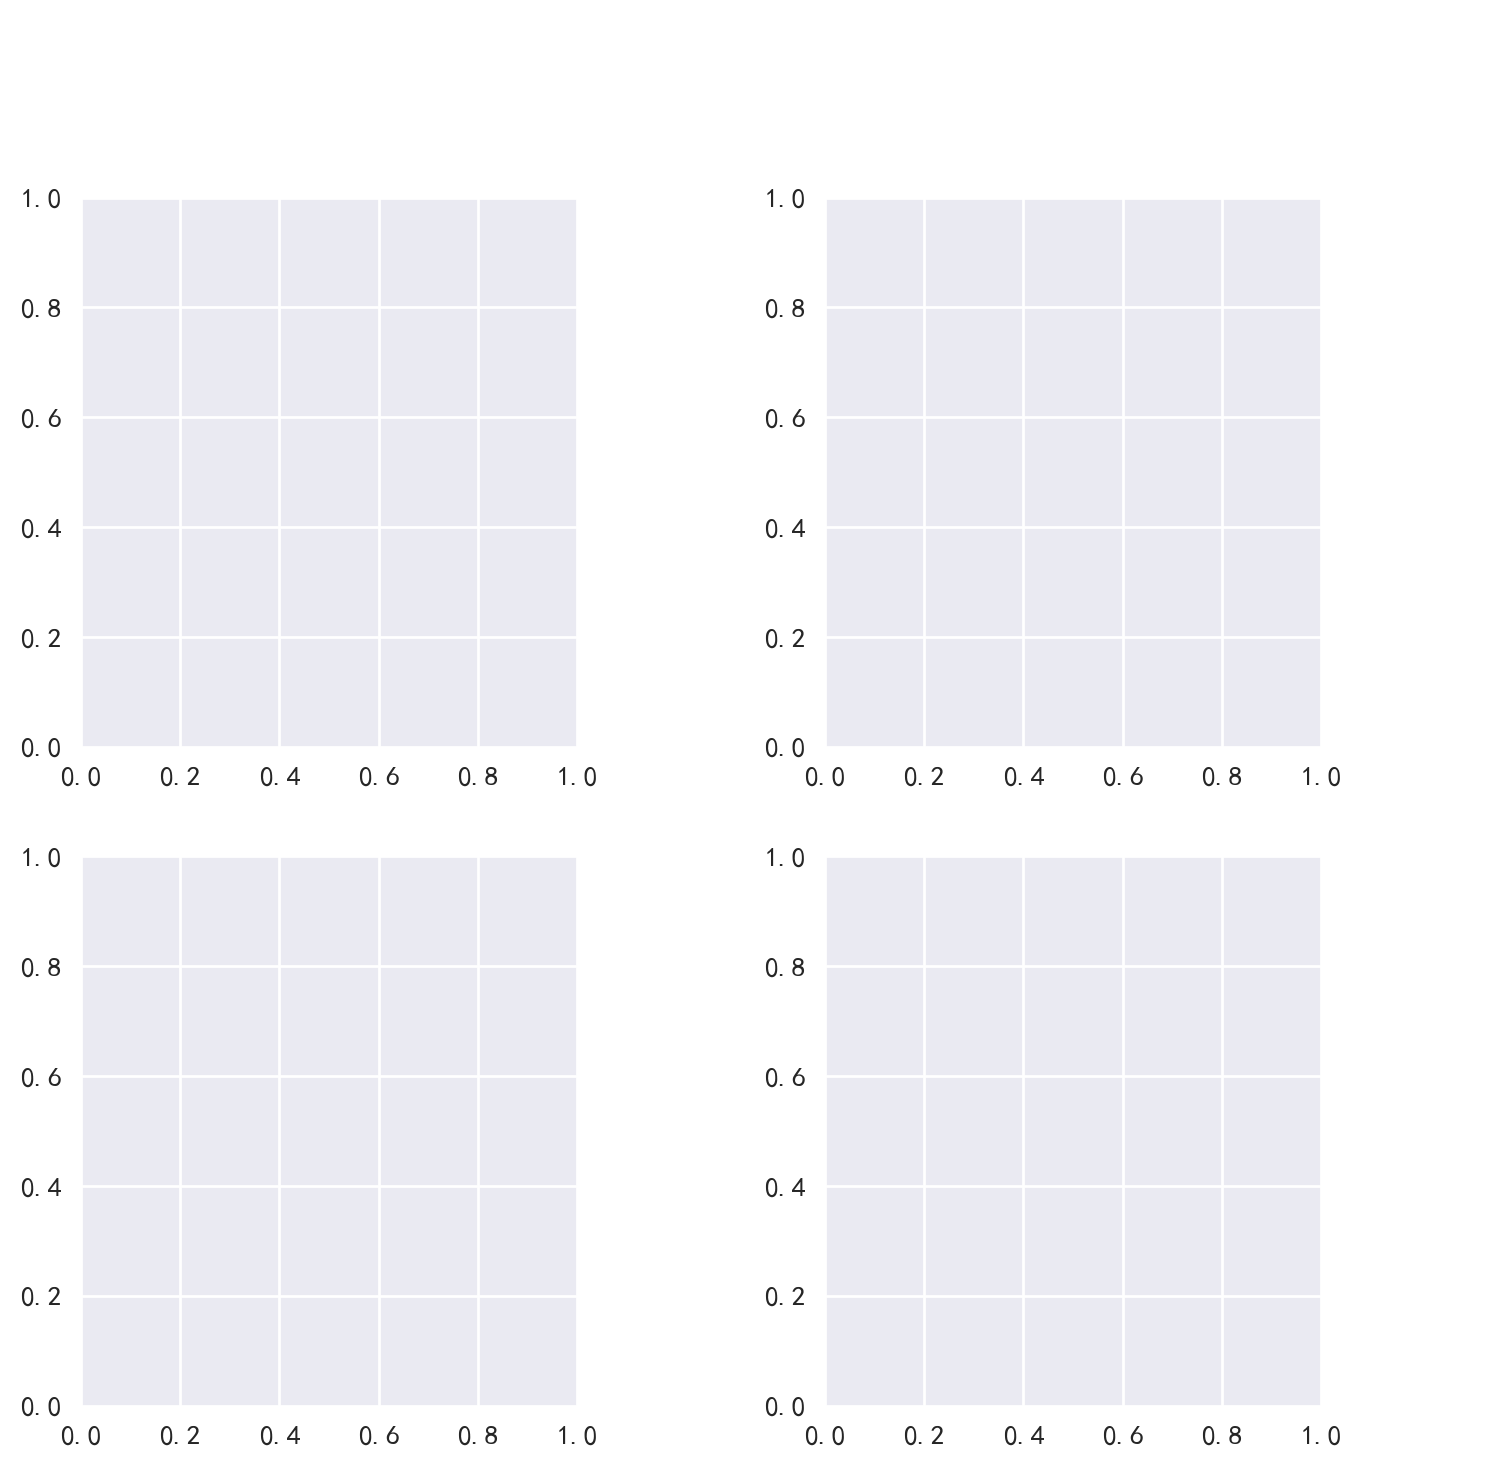

In [ ]:
plt.figure(figsize=(8, 9), dpi=500)
fig, axj = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), dpi=200)
axes = axj.flatten()  # 子图展平
i = -4
explode = []

for _ in axes:
    # 这是的ax相当于平时的plt
    # ax.bar
    plt.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=0.5, hspace=0.2)  # 调整子图间距
# 多图公用一个图例
patches, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(patches, labels, loc='upper right')
plt.show()


# 格式控制


## 颜色

### colormap


Colormap分**ListedColormap**和**LinearSegmentedColormap**两种，前一种存储特定的颜色（比如说红白黑三种），使用colors可以取出所有的RGBA色号值；后一种可能是**渐变色**无colors属性。

colormap的使用有两种方法，一种是`plt.cm`，一种是`plt.get_cmap()`两种方法稍微有所差异，但是在作为参数传入函数时都需要对其进行索引。

更多内容请查阅[官方文档](https://matplotlib.org/tutorials/colors/colormaps.html)

<BarContainer object of 5 artists>

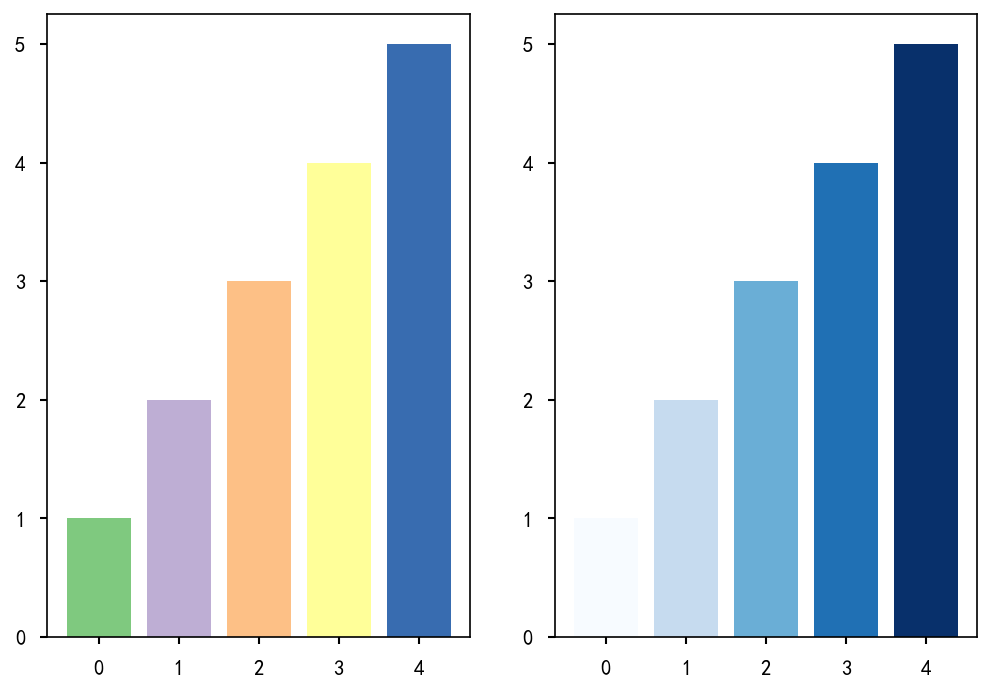

In [38]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.figure(dpi=150)


##ListedColormap
#取多种颜色
plt.subplot(1, 2, 1)
#plt.bar(range(5),range(1,6),color=plt.cm.Accent(range(5)))
#plt.bar(range(5),range(1,6),color=plt.cm.get_cmap('Accent')(range(5)))
plt.bar(range(5), range(1, 6), color=plt.get_cmap('Accent')(range(5)))


#取某一种颜色
# plt.subplot(1, 4, 2)
# plt.bar(range(5), range(1, 6), color=plt.cm.Accent(4))


##LinearSegmentedColormap
#取多种颜色
plt.subplot(1, 2, 2)
plt.bar(range(5), range(1, 6), color=plt.get_cmap(
    'Blues')(np.linspace(0, 1, 5)))


#取一种颜色
# plt.subplot(1, 4, 4)
# plt.bar(range(5), range(1, 6), color=plt.get_cmap('Blues')(3))


## 标签

修改xlabel和xtick的位置：https://www.statology.org/matplotlib-axis-label-position/

## 添加注释

在图形中额外添加文字，一般用来表征数值大小或者更加明显的图例之类的内容。
一般是选择使用`ax.text()`函数，传递参数包括标记注释的位置以及标记的内容等参数，这个函数只能对单个位置添加注释，所以更常用的一种方法是搭配着for循环对图形中的每一个点进行标注，大概类似于以下的例子:

```python
for x, y in zip(x, y):
    plt.text(x, y, 'text', ha='center', va='bottom', fontsize=10)

```

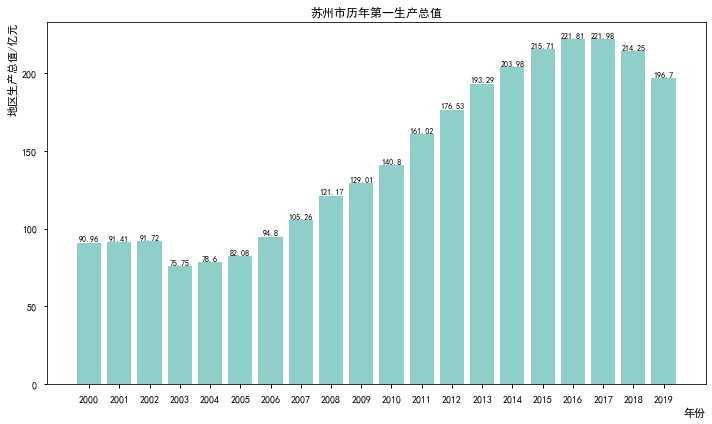

In [18]:
data = pd.read_excel('./raw_data/历年地区生产总值.xlsx')
# data.info()  # 查看导入数据是否存在异常
x = np.arange(data['年份'].shape[0])
y = data['第一产业']
x_tick = data['年份']
fig = plt.figure(figsize=(10, 6))
plt.bar(x, y, color=colors[0])
plt.title('苏州市历年第一生产总值')
plt.xlabel('年份', loc='right')
plt.ylabel('地区生产总值/亿元', loc='top')
plt.xticks(x, x_tick)
for x, y, x_tick in zip(x, y, x_tick):
    plt.text(x, y, f'{round(y,2)}', ha='center', va='bottom', fontsize=8)
plt.savefig('./plt样图/添加注释.png', facecolor='w')